In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/home/alireza/anaconda3/envs/adaexam/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:

# filenames = {"./stats/Mar1/stats_load_skip.txt": ["Decoder sparsity 0",
#                                                   "Decoder sparsity 5",
#                                                   "Encoder sparsity 0",
#                                                   "Encoder sparsity 5",
#                                                   "Encoder sparsity 40",
#                                                    ],
#              "./stats/Mar1/stats_load_skip2.txt": ["Decoder sparsity 10",
#                                                   "Decoder sparsity 15",
#                                                   "Encoder sparsity 10",
#                                                   "Encoder sparsity 15",
#                                                    "Encoder sparsity 45",
#                                                    ],
#              "./stats/Mar1/stats_load_skip3.txt": ["Decoder sparsity 20",
#                                                   "Decoder sparsity 25",
#                                                   "Encoder sparsity 20",
#                                                   "Encoder sparsity 25",
#                                                    "Decoder sparsity 40",
#                                                    "Decoder sparsity 45",
#                                                    ],
#              "./stats/Mar1/stats_load_skip4.txt": ["Decoder sparsity 30",
#                                                   "Decoder sparsity 35",
#                                                   "Encoder sparsity 30",
#                                                   "Encoder sparsity 35",
#                                                     ],
#              }

# filenames =  {"./stats/Mar16/stats_rearrange16.txt":
#                   ["Rearrange 16*16 Sparsity 0",
#                    "Rearrange 16*16 Sparsity 10",
#                    "Rearrange 16*16 Sparsity 20",
#                    "Rearrange 16*16 Sparsity 30",
#                    "Rearrange 16*16 Sparsity 40",
#                    "Rearrange 16*16 Sparsity 50",
#                    "Rearrange 16*16 Sparsity 60",
#                    "Rearrange 16*16 Sparsity 70",
#                    "Rearrange 16*16 Sparsity 80",
#                    "Rearrange 16*16 Sparsity 90"],
#               "./stats/Mar16/stats_rearrange16_2.txt":
#                   ["TiCSAT 16*16 Sparsity 0",
#                    "TiCSAT 16*16 Sparsity 10",
#                    "TiCSAT 16*16 Sparsity 20",
#                    "TiCSAT 16*16 Sparsity 30",
#                    "TiCSAT 16*16 Sparsity 40",
#                    "TiCSAT 16*16 Sparsity 50",
#                    "TiCSAT 16*16 Sparsity 60",
#                    "TiCSAT 16*16 Sparsity 70",
#                    "TiCSAT 16*16 Sparsity 80",
#                    "TiCSAT 16*16 Sparsity 90"]
# "./stats/Mar13/stats_rearrange16_2.txt" : ["TiCSAT 16*16_256",
#                                                         "Rearranged 16*16",
#                                                         "TiCSAT 16*16_512"],
    # "./stats/Mar7/stats_load_skip4.txt": ["Memory Rearranged",
    #                                                "TiCSAT 8*8"]
# }

filenames = {"./stats/Mar17/stats_rearrange16.txt":
                 ["Rearrange 16*16 Sparsity 90",
                   "Rearrange 16*16 Sparsity 80",
                   "Rearrange 16*16 Sparsity 70",
                   "Rearrange 16*16 Sparsity 60",
                   "Rearrange 16*16 Sparsity 50",
                   "Rearrange 16*16 Sparsity 40",
                   "Rearrange 16*16 Sparsity 30",
                   "Rearrange 16*16 Sparsity 20",
                   "Rearrange 16*16 Sparsity 10",
                   "Rearrange 16*16 Sparsity 0"],
             "./stats/Mar17/stats_rearrange16_2.txt":
             ["Zero-free 16*16 Sparsity 90",
                   "Zero-free 16*16 Sparsity 80",
                   "Zero-free 16*16 Sparsity 70",
                   "Zero-free 16*16 Sparsity 60",
                   "Zero-free 16*16 Sparsity 50",
                   "Zero-free 16*16 Sparsity 40",
                   "Zero-free 16*16 Sparsity 30",
                   "Zero-free 16*16 Sparsity 20",
                   "Zero-free 16*16 Sparsity 10",
                   "Zero-free 16*16 Sparsity 0"],
             "./stats/Mar30/stats_rearrange16.txt":
             ["O3 Zero-free 16*16 Sparsity 90",
                   "O3 Zero-free 16*16 Sparsity 40",
                   ],
             "./stats/Mar31/stats_rearrange16.txt":
             ["O3 Load-skip 16*16 Sparsity 90",
                   "O3 Load-skip 16*16 Sparsity 40",
                   ],
             "./stats/Apr1/stats_rearrange16.txt":
             ["Load-skip 16*16 ViT 4kB_128kB Sparsity 90",
                   "Load-skip 16*16 ViT 4kB_128kB Sparsity 40",
              "O3 Load-skip 16*16 lBert 4kB_128kB Sparsity 90",
                   "O3 Load-skip 16*16 lBert 4kB_128kB Sparsity 40",
                   ],
             "./stats/Apr1/stats_rearrange16_2.txt":
             ["Zero-free 16*16 ViT 4kB_128kB Sparsity 90",
                   "Zero-free 16*16 ViT 4kB_128kB Sparsity 40",
              "O3 Zero-free 16*16 lBert 4kB_128kB Sparsity 90",
                   "O3 Zero-free 16*16 lBert 4kB_128kB Sparsity 40",
              "Upper Bound 16*16 ViT 4kB_128kB Sparsity 90",
                   "Upper Bound 16*16 ViT 4kB_128kB Sparsity 40"
                   ],
             "./stats/Apr1/stats_prefetch.txt":
             ["O3 Prefetch Zero-free 16*16 lBert 4kB_128kB Sparsity 90",
                   "O3 Prefetch Zero-free 16*16 lBert 4kB_128kB Sparsity 40",
              "O3 Prefetch load-skip 16*16 lBert 4kB_128kB Sparsity 90",
                   "O3 Prefetch load-skip 16*16 lBert 4kB_128kB Sparsity 40"
                   ]}

feature_name = ['sim_seconds',
                'sim_ticks',
                'system.mem_ctrls.num_reads::total',
                'system.mem_ctrls.num_writes::total',
                'system.cpu.dcache.overall_hits::total',
                'system.cpu.dcache.overall_misses::total',
                'system.cpu.dcache.overall_accesses::total',
                'system.cpu.dcache.overall_miss_rate::total',
                'system.cpu.icache.overall_hits::total',
                'system.cpu.icache.overall_misses::total',
                'system.cpu.icache.overall_accesses::total',
                'system.cpu.icache.overall_miss_rate::total',
                'system.l2.overall_hits::total',
                'system.l2.overall_misses::total',
                'system.l2.overall_accesses::total',
                'system.l2.overall_miss_rate::total',
                'system.switch_cpus.idleCycles',
                'system.switch_cpus.op_class_0::IntAlu',
                'system.switch_cpus.op_class_0::IntMult',
                'system.switch_cpus.op_class_0::IntDiv',
                'system.switch_cpus.op_class_0::MemRead',
                'system.switch_cpus.op_class_0::MemWrite',
                'system.switch_cpus.op_class_0::CusAluProcess',
                'system.switch_cpus.op_class_0::CusAluParamWrite',
                'system.switch_cpus.op_class_0::CusAluQueue',
                'system.cpu.idleCycles',
                'system.cpu.op_class_0::IntAlu',
                'system.cpu.op_class_0::IntMult',
                'system.cpu.op_class_0::IntDiv',
                'system.cpu.op_class_0::MemRead',
                'system.cpu.op_class_0::MemWrite',
                'system.cpu.op_class_0::CusAluProcess',
                'system.cpu.op_class_0::CusAluParamWrite',
                'system.cpu.op_class_0::CusAluQueue',
                'system.l2.overall_miss_latency::total',
                'system.cpu.icache.overall_miss_latency::total',
                'system.cpu.dcache.overall_miss_latency::total',
                'system.l2.overall_misses::total',
                'system.cpu.dcache.overall_misses::total',
                'system.cpu.icache.overall_misses::total'
                ]

MHA_layers = ["Query", "Key", "Value", "Transpose", "QKT", "Pre-Softmax", "Score", "Post-Softmax"]
# layers = ["{}{}".format(l, i) for i in range(1,17) for l in MHA_layers ]
# layers += ["Nan", "Projection", "Add/Norm0", "FF0", "FF1", "Add/Norm1"]
layers = ["MHA", "Projection", "Add/Norm0", "FF0", "FF1", "Add/Norm1"]

In [3]:
df = pd.DataFrame()

for filename in filenames.keys():
    exp_list = []
    with open(filename, 'r') as kernel_file:
        lines = kernel_file.readlines()
        exp_index = 0
        for line in lines:
            if line.startswith('---------- Begin Simulation Statistics'):
                experiment = {'model': filenames[filename][exp_index // len(layers)],
                              'layer': layers[exp_index % len(layers)]}
            else:
                for k in feature_name:
                    if line.startswith(k):
                        l = line.split(k)[1]
                        l = l.split()[0]
                        experiment[k] = np.float64(l)
            if line.startswith('---------- End Simulation Statistics'):
                exp_list.append(experiment)
                exp_index += 1

                if exp_index >= len(layers) * len(filenames[filename]):
                    break

    df_kernel = pd.DataFrame(exp_list)
    df = pd.concat([df, df_kernel], axis=0, ignore_index=True)

df

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.op_class_0::IntAlu,system.cpu.op_class_0::IntMult,system.cpu.op_class_0::IntDiv,system.cpu.op_class_0::MemRead,...,system.cpu.icache.overall_hits::total,system.cpu.icache.overall_misses::total,system.cpu.icache.overall_miss_latency::total,system.cpu.icache.overall_accesses::total,system.cpu.icache.overall_miss_rate::total,system.l2.overall_hits::total,system.l2.overall_misses::total,system.l2.overall_miss_latency::total,system.l2.overall_accesses::total,system.l2.overall_miss_rate::total
0,Rearrange 16*16 Sparsity 90,MHA,0.747375,7.473749e+11,190184.0,126874.0,476479533.0,38861.0,4197828.0,116294958.0,...,209962202.0,193532.0,6.716274e+09,210155734.0,0.000921,1598501.0,190187.0,2.249178e+10,1788688.0,0.106328
1,Rearrange 16*16 Sparsity 90,Projection,0.058092,5.809175e+10,55755.0,27443.0,36711314.0,5468.0,573.0,8593760.0,...,14905101.0,44768.0,1.965082e+09,14949869.0,0.002995,126207.0,55759.0,6.424546e+09,181966.0,0.306425
2,Rearrange 16*16 Sparsity 90,Add/Norm0,0.039299,3.929856e+10,40715.0,21364.0,16871738.0,1087517.0,35320.0,4835978.0,...,8508929.0,35753.0,1.622628e+09,8544682.0,0.004184,361824.0,40719.0,4.717175e+09,402543.0,0.101154
3,Rearrange 16*16 Sparsity 90,FF0,0.218435,2.184350e+11,232034.0,175575.0,141061816.0,9879.0,1236.0,32773174.0,...,57067189.0,76533.0,2.882127e+09,57143722.0,0.001339,260700.0,232037.0,2.586496e+10,492737.0,0.470915
4,Rearrange 16*16 Sparsity 90,FF1,0.209697,2.096975e+11,149774.0,45510.0,140297339.0,7869.0,1217.0,32588724.0,...,56665847.0,52986.0,2.221566e+09,56718833.0,0.000934,323490.0,149778.0,1.755890e+10,473268.0,0.316476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,O3 Prefetch load-skip 16*16 lBert 4kB_128kB Sp...,Projection,0.139032,1.390317e+11,86382.0,41151.0,70241534.0,6730.0,908.0,46191518.0,...,16655195.0,46441.0,1.489119e+09,16701636.0,0.002781,475153.0,23730.0,3.885679e+09,498883.0,0.047566
224,O3 Prefetch load-skip 16*16 lBert 4kB_128kB Sp...,Add/Norm0,0.036754,3.675362e+10,68424.0,38719.0,17883161.0,1087429.0,35298.0,5099873.0,...,8339471.0,34839.0,1.136463e+09,8374310.0,0.004160,414965.0,13207.0,1.422849e+09,428172.0,0.030845
225,O3 Prefetch load-skip 16*16 lBert 4kB_128kB Sp...,FF0,0.543032,5.430319e+11,1404572.0,1291896.0,274030310.0,15183.0,2638.0,183744958.0,...,63368495.0,87910.0,2.766721e+09,63456405.0,0.001385,1541060.0,146186.0,2.046940e+10,1687246.0,0.086642
226,O3 Prefetch load-skip 16*16 lBert 4kB_128kB Sp...,FF1,0.537508,5.375075e+11,188631.0,68309.0,273017112.0,12670.0,2602.0,183617995.0,...,62866815.0,65668.0,2.082940e+09,62932483.0,0.001043,1610646.0,45079.0,1.046385e+10,1655725.0,0.027226


In [17]:
# df.to_csv('./output/load_skip_data.csv', sep=',')

In [4]:
prunable_layers = ["Query", "Key", "Value", "Projection", "FF0", "FF1"]

In [19]:
df_encoder_0 = df[df['model'] == "Encoder sparsity 0"].copy()
df_encoder_0['prunable'] = df_encoder_0['layer']\
    .apply(lambda x: (x in prunable_layers) | (x[:-1] in prunable_layers))
df_encoder_0.groupby('prunable')['sim_seconds'].sum()


Series([], Name: sim_seconds, dtype: float64)

In [20]:
df_decoder_0 = df[df['model'] == "Decoder sparsity 0"].copy()
df_decoder_0_extra = df_decoder_0[df_decoder_0['layer'].apply(lambda x: x[:-1] in ["Query", "Key", "Value", "Transpose", "QKT", "Pre-Softmax", "Score", "Post-Softmax"])]

df_decoder_0 = pd.concat([df_decoder_0, df_decoder_0_extra], ignore_index=True)
df_decoder_0['prunable'] = df_decoder_0['layer']\
    .apply(lambda x: (x in prunable_layers) | (x[:-1] in prunable_layers))
df_decoder_0.groupby('prunable')['sim_seconds'].sum()

Series([], Name: sim_seconds, dtype: float64)

# Memory rearranged

<Figure size 1152x1152 with 0 Axes>

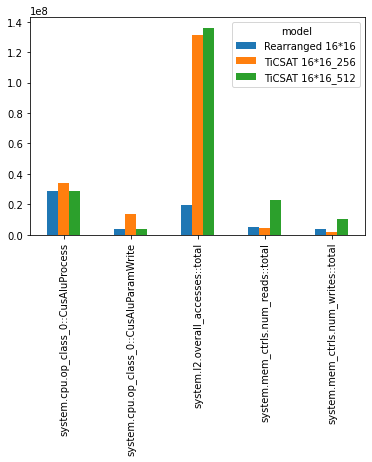

In [26]:
gemm_MHA_layers = ["Query", "Key", "Value", "QKT", "Score"]
gemm_layers = ["{}{}".format(l, i) for i in range(1,17) for l in gemm_MHA_layers ]
gemm_layers += ["Projection", "FF0", "FF1"]

non_gem_layers = [x for x in layers if x not in gemm_layers]

df['is_gemm'] = df['layer'].apply(lambda x: x in gemm_layers)
df_compare = df.groupby(['model'])[[ #'sim_seconds',
                                  # 'system.cpu.dcache.overall_accesses::total',
                                  'system.cpu.op_class_0::CusAluProcess',
                                    'system.cpu.op_class_0::CusAluParamWrite',
                                  'system.l2.overall_accesses::total',
                                  'system.mem_ctrls.num_reads::total',
                'system.mem_ctrls.num_writes::total',
                                  ]].sum()

# df_compare.reset_index().pivot(index='model', columns='is_gemm').plot.bar()
plt.figure(figsize=(16,16))
df_compare.transpose().plot.bar()
# plt.tight_layout()
plt.savefig('output/memory_rearranged_mem.png')

In [25]:
df_compare = df.groupby(['model'])['sim_seconds'].sum()

In [23]:
df_compare

model
Rearranged 16*16     6.704072
TiCSAT 16*16_256    10.361356
TiCSAT 16*16_512    12.048685
Name: sim_seconds, dtype: float64

# Load-skip Sparsity

In [64]:
df[df['layer'].apply(lambda x: x.startswith(''))].groupby('model')['sim_seconds'].sum()

model
Rearrange 16*16 Sparsity 0      6.949713
Rearrange 16*16 Sparsity 10     6.797845
Rearrange 16*16 Sparsity 20     6.699286
Rearrange 16*16 Sparsity 30     6.655673
Rearrange 16*16 Sparsity 40     6.507226
Rearrange 16*16 Sparsity 50     6.380063
Rearrange 16*16 Sparsity 60     6.248997
Rearrange 16*16 Sparsity 70     6.088848
Rearrange 16*16 Sparsity 80     5.933693
Rearrange 16*16 Sparsity 90     5.773522
TiCSAT 16*16 Sparsity 0        10.348878
TiCSAT 16*16 Sparsity 10        9.882017
TiCSAT 16*16 Sparsity 20        9.514620
TiCSAT 16*16 Sparsity 30        9.155397
TiCSAT 16*16 Sparsity 40        8.708290
TiCSAT 16*16 Sparsity 50        8.280271
TiCSAT 16*16 Sparsity 60        7.859124
TiCSAT 16*16 Sparsity 70        7.363610
TiCSAT 16*16 Sparsity 80        6.910815
TiCSAT 16*16 Sparsity 90        6.441591
Name: sim_seconds, dtype: float64

# Zero-free Sparsity

In [4]:
df['sparsity'] = df['model'].apply(lambda x: int(x.split(' ')[-1]))
df.head()

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.op_class_0::IntAlu,system.cpu.op_class_0::IntMult,system.cpu.op_class_0::IntDiv,system.cpu.op_class_0::MemRead,...,system.cpu.icache.overall_misses::total,system.cpu.icache.overall_miss_latency::total,system.cpu.icache.overall_accesses::total,system.cpu.icache.overall_miss_rate::total,system.l2.overall_hits::total,system.l2.overall_misses::total,system.l2.overall_miss_latency::total,system.l2.overall_accesses::total,system.l2.overall_miss_rate::total,sparsity
0,Rearrange 16*16 Sparsity 90,MHA,0.747375,7.473749e+11,190184.0,126874.0,476479533.0,38861.0,4197828.0,116294958.0,...,193532.0,6.716274e+09,210155734.0,0.000921,1598501.0,190187.0,2.249178e+10,1788688.0,0.106328,90
1,Rearrange 16*16 Sparsity 90,Projection,0.058092,5.809175e+10,55755.0,27443.0,36711314.0,5468.0,573.0,8593760.0,...,44768.0,1.965082e+09,14949869.0,0.002995,126207.0,55759.0,6.424546e+09,181966.0,0.306425,90
2,Rearrange 16*16 Sparsity 90,Add/Norm0,0.039299,3.929856e+10,40715.0,21364.0,16871738.0,1087517.0,35320.0,4835978.0,...,35753.0,1.622628e+09,8544682.0,0.004184,361824.0,40719.0,4.717175e+09,402543.0,0.101154,90
3,Rearrange 16*16 Sparsity 90,FF0,0.218435,2.184350e+11,232034.0,175575.0,141061816.0,9879.0,1236.0,32773174.0,...,76533.0,2.882127e+09,57143722.0,0.001339,260700.0,232037.0,2.586496e+10,492737.0,0.470915,90
4,Rearrange 16*16 Sparsity 90,FF1,0.209697,2.096975e+11,149774.0,45510.0,140297339.0,7869.0,1217.0,32588724.0,...,52986.0,2.221566e+09,56718833.0,0.000934,323490.0,149778.0,1.755890e+10,473268.0,0.316476,90


In [4]:
df_sim_seconds = df[df['layer'].apply(lambda x: x.startswith(''))].groupby('model')['sim_seconds'].sum()
df_sim_seconds

model
Load-skip 16*16 ViT 4kB_128kB Sparsity 40                  0.579612
Load-skip 16*16 ViT 4kB_128kB Sparsity 90                  0.213500
O3 Load-skip 16*16 Sparsity 40                             2.328392
O3 Load-skip 16*16 Sparsity 90                             0.846262
O3 Load-skip 16*16 lBert 4kB_128kB Sparsity 40             2.741566
O3 Load-skip 16*16 lBert 4kB_128kB Sparsity 90             1.032362
O3 Prefetch Zero-free 16*16 lBert 4kB_128kB Sparsity 40    2.047061
O3 Prefetch Zero-free 16*16 lBert 4kB_128kB Sparsity 90    0.731497
O3 Prefetch load-skip 16*16 lBert 4kB_128kB Sparsity 40    2.055805
O3 Prefetch load-skip 16*16 lBert 4kB_128kB Sparsity 90    0.761834
O3 Zero-free 16*16 Sparsity 40                             2.298822
O3 Zero-free 16*16 Sparsity 90                             0.801542
O3 Zero-free 16*16 lBert 4kB_128kB Sparsity 40             2.729037
O3 Zero-free 16*16 lBert 4kB_128kB Sparsity 90             0.989339
Rearrange 16*16 Sparsity 0                

In [8]:
df[df['layer'].apply(lambda x: x.startswith(''))].groupby('model')['system.cpu.dcache.overall_accesses::total'].sum()

model
O3 Zero-free 16*16 Sparsity 40    2.298822
O3 Zero-free 16*16 Sparsity 90    0.801542
Rearrange 16*16 Sparsity 0        6.254669
Rearrange 16*16 Sparsity 10       5.712859
Rearrange 16*16 Sparsity 20       5.166207
Rearrange 16*16 Sparsity 30       4.602433
Rearrange 16*16 Sparsity 40       4.056336
Rearrange 16*16 Sparsity 50       3.491527
Rearrange 16*16 Sparsity 60       2.959746
Rearrange 16*16 Sparsity 70       2.390253
Rearrange 16*16 Sparsity 80       1.859953
Rearrange 16*16 Sparsity 90       1.312524
Zero-free 16*16 Sparsity 0        6.218148
Zero-free 16*16 Sparsity 10       5.672922
Zero-free 16*16 Sparsity 20       5.122899
Zero-free 16*16 Sparsity 30       4.556787
Zero-free 16*16 Sparsity 40       4.008140
Zero-free 16*16 Sparsity 50       3.439999
Zero-free 16*16 Sparsity 60       2.904682
Zero-free 16*16 Sparsity 70       2.333509
Zero-free 16*16 Sparsity 80       1.798609
Zero-free 16*16 Sparsity 90       1.250264
Name: sim_seconds, dtype: float64

<BarContainer object of 2 artists>

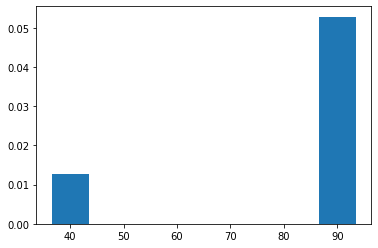

In [8]:
ratio = []
for i in range(40, 100, 50):
    load_skip = df_sim_seconds.loc['O3 Load-skip 16*16 Sparsity {}'.format(i)]
    zero_free = df_sim_seconds.loc['O3 Zero-free 16*16 Sparsity {}'.format(i)]
    ratio.append((load_skip - zero_free)/(load_skip))

plt.bar(np.arange(40, 100, 50), height=ratio, width=7)

In [5]:
df[(df['model'].apply(lambda  x : x.endswith('90')) ) & (df['layer'] == 'FF0')]

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.op_class_0::IntAlu,system.cpu.op_class_0::IntMult,system.cpu.op_class_0::IntDiv,system.cpu.op_class_0::MemRead,...,system.cpu.icache.overall_hits::total,system.cpu.icache.overall_misses::total,system.cpu.icache.overall_miss_latency::total,system.cpu.icache.overall_accesses::total,system.cpu.icache.overall_miss_rate::total,system.l2.overall_hits::total,system.l2.overall_misses::total,system.l2.overall_miss_latency::total,system.l2.overall_accesses::total,system.l2.overall_miss_rate::total
3,Rearrange 16*16 Sparsity 90,FF0,0.218435,2.184350e+11,232034.0,175575.0,141061816.0,9879.0,1236.0,32773174.0,...,57067189.0,76533.0,2.882127e+09,57143722.0,0.001339,260700.0,232037.0,2.586496e+10,492737.0,0.470915
63,Zero-free 16*16 Sparsity 90,FF0,0.197777,1.977771e+11,148950.0,151674.0,125516365.0,9581.0,1162.0,31848681.0,...,51811741.0,68801.0,2.665177e+09,51880542.0,0.001326,252492.0,148954.0,1.790863e+10,401446.0,0.371044
123,O3 Zero-free 16*16 Sparsity 90,FF0,0.117967,1.179666e+11,150645.0,152656.0,47660230.0,8217.0,822.0,31821616.0,...,12137543.0,64395.0,2.577683e+09,12201938.0,0.005277,239673.0,150650.0,1.772165e+10,390323.0,0.385962
135,O3 Load-skip 16*16 Sparsity 90,FF0,0.139336,1.393360e+11,275714.0,230289.0,63221264.0,8656.0,927.0,32750604.0,...,14724146.0,65061.0,2.485386e+09,14789207.0,0.004399,160015.0,275717.0,2.949167e+10,435732.0,0.632767
147,Load-skip 16*16 ViT 4kB_128kB Sparsity 90,FF0,0.058653,5.865308e+10,142941.0,45369.0,34328839.0,5066.0,580.0,4700219.0,...,11840835.0,132716.0,5.831729e+09,11973551.0,0.011084,160705.0,142945.0,1.583002e+10,303650.0,0.470756
159,O3 Load-skip 16*16 lBert 4kB_128kB Sparsity 90,FF0,0.156644,1.566438e+11,342809.0,249703.0,63242880.0,8963.0,992.0,32756473.0,...,14424199.0,307840.0,1.244577e+10,14732039.0,0.020896,628664.0,342813.0,3.848904e+10,971477.0,0.352878
171,Zero-free 16*16 ViT 4kB_128kB Sparsity 90,FF0,0.037569,3.756926e+10,77600.0,40962.0,18814613.0,4717.0,508.0,3773293.0,...,7537754.0,129557.0,5.504156e+09,7667311.0,0.016897,162958.0,77603.0,9.123062e+09,240561.0,0.322592
183,O3 Zero-free 16*16 lBert 4kB_128kB Sparsity 90,FF0,0.140733,1.407332e+11,306544.0,257326.0,47697215.0,8764.0,948.0,31832003.0,...,11841056.0,305734.0,1.256630e+10,12146790.0,0.025170,606747.0,306547.0,3.465664e+10,913294.0,0.335650
195,Upper Bound 16*16 ViT 4kB_128kB Sparsity 90,FF0,0.036763,3.676312e+10,68106.0,38765.0,18934738.0,4862.0,526.0,3664231.0,...,7680606.0,130382.0,5.535614e+09,7810988.0,0.016692,162799.0,68109.0,7.809072e+09,230908.0,0.294962
207,O3 Prefetch Zero-free 16*16 lBert 4kB_128kB Sp...,FF0,0.100059,1.000594e+11,198698.0,156195.0,47647410.0,7969.0,745.0,31817913.0,...,12114056.0,60445.0,1.895579e+09,12174501.0,0.004965,388959.0,39655.0,5.779363e+09,428614.0,0.092519
